In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'ex2data1.txt'
data = pd.read_csv(path, names = ['score_1', 'score_2', 'result'])
data.head()

,score_1,score_2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


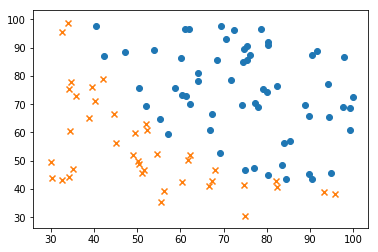

In [2]:
positive = data[data.result.isin(['1'])]
negative = data[data.result.isin(['0'])]
fig, ax = plt.subplots()
ax.scatter(positive.score_1, positive.score_2)
ax.scatter(negative.score_1, negative.score_2, marker = 'x')
plt.show()

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

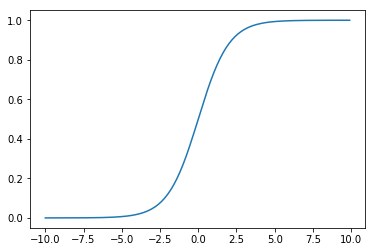

In [4]:
x1 = np.arange(-10,10,0.1)
plt.plot(x1, sigmoid(x1))
plt.show()

In [5]:
def computeCost(theta, X, y):
    first = -y * np.log(sigmoid(X@theta))
    second = -(1-y) * np.log(1 - sigmoid(X@theta))
    return np.mean(first + second)

In [6]:
data.insert(0, 'Ones', 1)
X = data.iloc[ : , : -1].values
y = data.iloc[ : , -1].values
theta = np.zeros(X.shape[1])

In [7]:
computeCost(theta, X, y)

0.6931471805599453

In [8]:
def gradient(theta, X, y):
    return (X.T @ (sigmoid(X@theta) - y)) / len(X)

In [9]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [10]:
import scipy.optimize as opt

In [11]:
result = opt.fmin_tnc(func = computeCost, x0 = theta, fprime = gradient, args = (X, y))
#在func和gradient中，theta要放在第一个位置

In [12]:
result

(array([-25.16131854,   0.20623159,   0.20147149]), 36, 0)

In [13]:
from sklearn.metrics import classification_report

In [14]:
def predict(theta, X):
    probability = X @ theta
    return [1 if x >= 0.5 else 0 for x in probability]

In [15]:
final_theta = result[0]
predictions = predict(final_theta, X)

In [16]:
print(classification_report(predictions, y))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.88      0.93      0.91        57

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.88      0.89       100
weighted avg       0.89      0.89      0.89       100



In [17]:
x1 = np.arange(130, step = 0.1)
x2 = -(x1 * final_theta[1] + final_theta[0]) / final_theta[2]

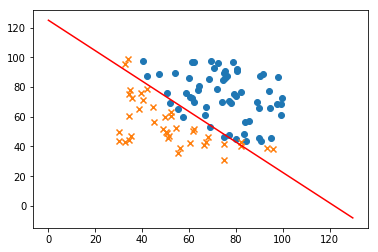

In [18]:
fig, ax = plt.subplots()
ax.scatter(positive.score_1, positive.score_2)
ax.scatter(negative.score_1, negative.score_2, marker = 'x')
ax.plot(x1, x2, color = 'red')
plt.show()